# Data manipulations

A matrix transformation is a matrix multiplication between a transformation matrix M and a data matrix D that gives you a manipulated data matrix D' as output.

We can use matrix multiplications to transform our data (our data points, represented as feature vectors).

## But first, some review of dot products

What is being done in this cell?

* Element-wise multiply [4,5,6] and [1,2,3] and then sum
* Element-wise multiply [7,8,9] and [1,2,3] and then sum

In [2]:
import numpy as np

v = np.array([1,2,3])
m = np.array([[4,5,6], [7,8,9]])

print(m@v)

[32 50]


And in this cell?
* 32: Element-wise multiply [4,5,6] and [1,2,3] and then sum
* 6540: Element-wise multiply [4,5,6] and [10, 100, 1000] and then sum
* 50: Element-wise multiply [7,8,9] and [1,2,3] and then sum
* 9870: Element-wise multiply [7,8,9] and [10, 100, 1000] and then sum

In [3]:
m2 = np.array([[1,2,3], [10, 100, 1000]])

print(m@m2.T)

[[  32 6540]
 [  50 9870]]


## Load and look at our data

Let's load the used car data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

data = np.array(np.genfromtxt('data/vehiclesNumeric.csv', delimiter=',', skip_header=1, dtype=int, encoding="utf-8"))  

# get a pandas dataframe for plotting
df = pd.DataFrame(data, columns=["id", "price", "year", "odometer"])

Let's get some **summary statistics**.

In [4]:
def getSummaryStatistics(data):
    print("min, max, mean, std per variable")
    return pd.DataFrame([data.min(axis=0), data.max(axis=0), data.mean(axis=0), data.std(axis=0)])

def getShapeType(data):
    print("shape")
    return (data.shape, data.dtype)

print(getSummaryStatistics(data))
print(getShapeType(data))

min, max, mean, std per variable
              0             1            2             3
0  7.301646e+09      0.000000  1999.000000  0.000000e+00
1  7.317071e+09  55000.000000  2021.000000  9.999999e+06
2  7.311729e+09   7978.281507  2012.381887  1.124405e+05
3  4.299268e+06   5542.906703     3.997048  2.546163e+05
shape
((3158, 4), dtype('int64'))


Let's **reduce the data** to two dimensions, just year and price.


In [5]:
# How are we going to get just those two columns?
reducedData = data[:, [1,2]]

print(getSummaryStatistics(reducedData))
print(getShapeType(reducedData))

min, max, mean, std per variable
              0            1
0      0.000000  1999.000000
1  55000.000000  2021.000000
2   7978.281507  2012.381887
3   5542.906703     3.997048
shape
((3158, 2), dtype('int64'))


Let's plot the used car data.

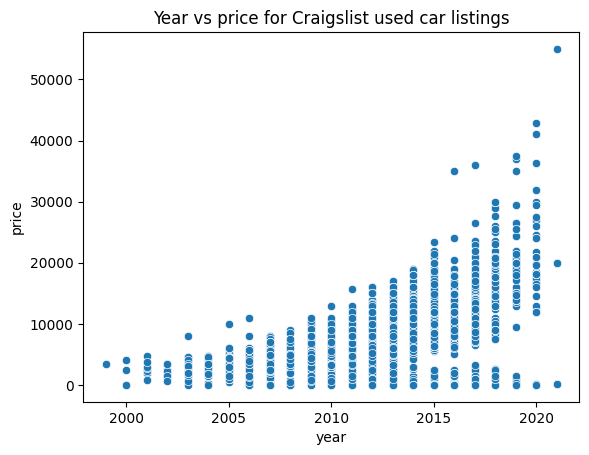

In [6]:
def plot2d(data):
    sns.scatterplot(pd.DataFrame(data[:, [0, 1]], columns=["price", "year"]), x="year", y="price").set(title="Year vs price for Craigslist used car listings")
    
plot2d(reducedData)

## Translation

Translation is a kind of data transformation where we move data around, but each data point stays the same distance away from every other data point.

Translation is a two step process:
* Add homogeneous coordinate
* Do translation as matrix multiplication

### Add homogeneous coordinate

We need to add a dummy column of ones so we can do the matrix multiplication. Why? See https://www.sciencedirect.com/topics/mathematics/homogeneous-coordinate.

In [7]:
# How do we append a whole column?
homogenizedData = np.append(reducedData, np.array([np.ones(reducedData.shape[0], dtype=int)]).T, axis=1)
print("homogenized data")
print(getSummaryStatistics(homogenizedData))
print(getShapeType(homogenizedData))

homogenized data
min, max, mean, std per variable
              0            1    2
0      0.000000  1999.000000  1.0
1  55000.000000  2021.000000  1.0
2   7978.281507  2012.381887  1.0
3   5542.906703     3.997048  0.0
shape
((3158, 3), dtype('int64'))


### Translate

Let's **translate** that year column so that it too starts at 0.

A translation matrix for two-variable data looks like:
$$\begin{pmatrix} 1 & 0 & x \\ 0 & 1 & y \\ 0 & 0 & 1\end{pmatrix}$$
where $x, y$ are the amount by which you want the $0th$ and $1st$ variables translated, respectively.



transformMatrix
[[    1     0     0]
 [    0     1 -1999]
 [    0     0     1]]
[[9988 2014    1]
 [5500 2010    1]
 [9500 2013    1]
 [9988 2014    1]]
after translation, transformedData
min, max, mean, std per variable
              0          1    2
0      0.000000   0.000000  1.0
1  55000.000000  22.000000  1.0
2   7978.281507  13.381887  1.0
3   5542.906703   3.997048  0.0
shape
((3158, 3), dtype('int64'))


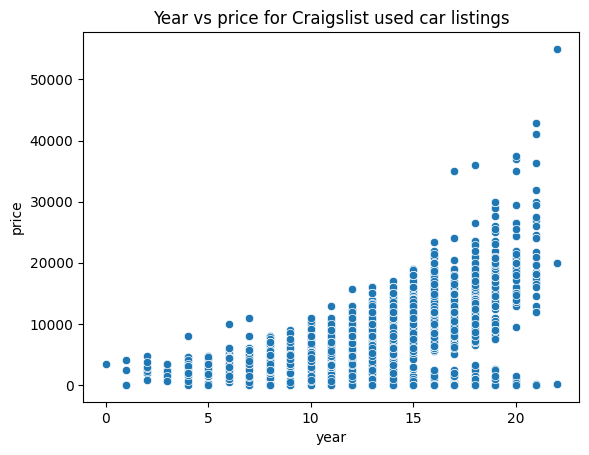

In [8]:
# we need to define a transformation matrix that will allow us to shift the price variable; this one will be the identity matrix with the translation specified in an extra last column
translateTransform = np.eye(homogenizedData.shape[1], dtype=int)
translateTransform[1, 2] = -reducedData[:, 1].min()
print("transformMatrix")
print(translateTransform)

print(homogenizedData[0:4])

# now we need to do the translation
transformedData = (translateTransform@homogenizedData.T).T
print("after translation, transformedData")
print(getSummaryStatistics(transformedData))
print(getShapeType(transformedData))
plot2d(transformedData)

Check:
* only the summary statistics for year should have changed
* the standard deviation for year should be the same

## Scaling

Scaling is kind of data transformation where we increase or decrease the range of one or more variables.

### Scaling on its own

Let's **scale** that year column so it's months instead of years.

A scaling matrix for two-variable data looks like:
$$\begin{pmatrix} x & 0 \\ 0 & y \end{pmatrix}$$
where $x, y$ are the amount by which you want the $0th$ and $1st$ variables scaled, respectively. 


transformMatrix
[[ 1.  0.]
 [ 0. 12.]]
after scaling, transformedData
min, max, mean, std per variable
              0             1
0      0.000000  23988.000000
1  55000.000000  24252.000000
2   7978.281507  24148.582647
3   5542.906703     47.964574
shape
((3158, 2), dtype('float64'))


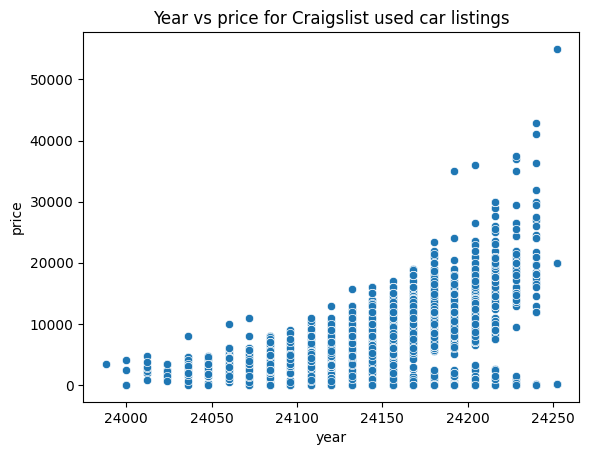

In [9]:
scaleTransform = np.eye(reducedData.shape[1], dtype=float)
scaleTransform[1, 1] = 12
print("transformMatrix")
print(scaleTransform)

transformedData = (scaleTransform@reducedData.T).T
print("after scaling, transformedData")
print(getSummaryStatistics(transformedData))
print(getShapeType(transformedData))
plot2d(transformedData)

Check:
* only the summary statistics for year should have changed

### Scaling together with other transformations

If you want to translate *and* scale, you just add the homogeneous coordinate into the scaling matrix too!
$$\begin{pmatrix} x & 0 & 0\\ 0 & y & 0 \\ 0 & 0 & 1 \end{pmatrix}$$



transformMatrix
[[ 1.  0.  0.]
 [ 0. 12.  0.]
 [ 0.  0.  1.]]
transformMatrix
[[ 1.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  1.000e+00 -1.999e+03]
 [ 0.000e+00  0.000e+00  1.000e+00]]
after scaling, transformedData
min, max, mean, std per variable
              0             1    2
0      0.000000  21989.000000  1.0
1  55000.000000  22253.000000  1.0
2   7978.281507  22149.582647  1.0
3   5542.906703     47.964574  0.0
shape
((3158, 3), dtype('float64'))


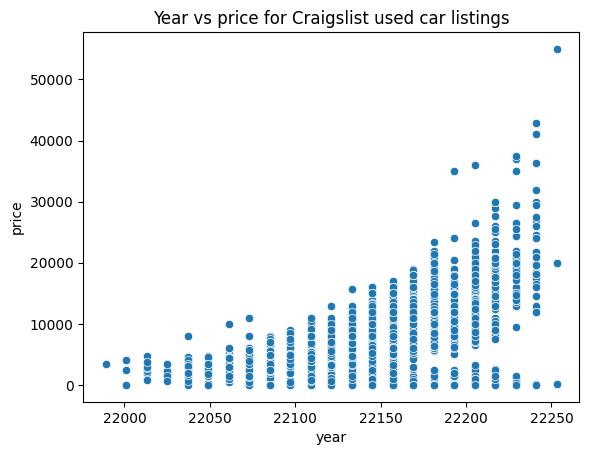

In [10]:
scaleTransform = np.eye(homogenizedData.shape[1], dtype=float)
scaleTransform[1, 1] = 12
print("transformMatrix")
print(scaleTransform)

translateTransform = np.eye(homogenizedData.shape[1], dtype=float)
translateTransform[1, 2] = -reducedData[:, 1].min()
print("transformMatrix")
print(translateTransform)

transformMatrix = translateTransform@scaleTransform

transformedData = (transformMatrix@homogenizedData.T).T
print("after scaling, transformedData")
print(getSummaryStatistics(transformedData))
print(getShapeType(transformedData))
plot2d(transformedData)

Check:
* Although we added the homogeneous coordinate, the scaling produced the same output as before